In [1]:
import numpy as np
from scipy.integrate import nquad
from scipy.stats import multivariate_normal

##### 1a

In [17]:
def integrand(v, A, w):
    v = np.array(v)
    return np.exp(-0.5 * v @ A @ v + w @ v)

def numerical_integral(A, w):
    N = len(w)
    bounds = [(-np.inf, np.inf)] * N
    result, error = nquad(lambda *v: integrand(v, A, w), bounds)
    return result

def analytical_result(A, w):
    N = len(w)
    A_inv = np.linalg.inv(A)
    determinant = np.linalg.det(A_inv)
    exponent = 0.5 * w @ A_inv @ w
    return np.sqrt((2 * np.pi) ** N * determinant) * np.exp(exponent)


##### 1b

In [18]:
A = np.array([[4, 2, 1], [2, 5, 3], [1, 3, 6]]) 
A_prime = np.array([[4, 2, 1], [2, 1, 3], [1, 3, 6]]) 
w = np.array([1, 2, 3])

print(np.linalg.eigvals(A_prime))
print(np.linalg.eigvals(A))

numerical_value_A = numerical_integral(A, w)
analytical_value_A = analytical_result(A, w)
print(f"Matrix A - Numerical Integral: {numerical_value_A}")
print(f"Matrix A - Analytical Result: {analytical_value_A}")

# We can see, that A_prime is not positive definite, since once eigenvalue is negative
# Therefore the integral will not converge for A_prime

# numerical_value_A_prime = numerical_integral(A_prime, w)
# analytical_value_A_prime = analytical_result(A_prime, w)
# print(f"Matrix A' - Numerical Integral: {numerical_value_A_prime}")
# print(f"Matrix A' - Analytical Result: {analytical_value_A_prime}")


[ 8.18227818  3.65391611 -0.83619429]
[9.34849393 3.73015912 1.92134694]
Matrix A - Numerical Integral: 4.275823659021463
Matrix A - Analytical Result: 4.275823659011514


In [22]:
# Define A (covariance matrix) and w (mean adjustment vector)
A = np.array([[4, 2, 1],
              [2, 5, 3],
              [1, 3, 6]])
w = np.array([1, 2, 3])

# Compute the inverse of A
A_inv = np.linalg.inv(A)

# Compute closed-form means
mu = A_inv @ w  # μ = A⁻¹ w

# Compute closed-form second moments (covariance matrix)
cov_matrix = A_inv  # Cov(v_i, v_j) = (A⁻¹)_ij

# Closed-form second moments
second_moments = cov_matrix + np.outer(mu, mu)  # E[v_i v_j] = Cov(v_i, v_j) + E[v_i]E[v_j]

# Monte Carlo sampling for numerical estimation
num_samples = 1000000  # Large number of samples for accuracy
samples = multivariate_normal.rvs(mean=mu, cov=cov_matrix, size=num_samples)

# Compute numerical means
numerical_means = np.mean(samples, axis=0)

# Compute numerical second moments
numerical_second_moments = np.mean(samples[:, :, None] * samples[:, None, :], axis=0)

# Compare results
print("Closed-form means:", mu)
print("Numerical means:", numerical_means)
print()
print("Closed-form second moments:\n", second_moments)
print("Numerical second moments:\n", numerical_second_moments)

# Verify similarity
mean_diff = np.abs(mu - numerical_means)
moment_diff = np.abs(second_moments - numerical_second_moments)

print("\nMean Differences:", mean_diff)
print("Second Moment Differences:\n", moment_diff)


Closed-form means: [0.08955224 0.10447761 0.43283582]
Numerical means: [0.08881361 0.10561511 0.43240611]

Closed-form second moments:
 [[ 0.32145244 -0.12497215  0.05368679]
 [-0.12497215  0.35419915 -0.10403208]
 [ 0.05368679 -0.10403208  0.42615282]]
Numerical second moments:
 [[ 0.32217593 -0.12545014  0.05295007]
 [-0.12545014  0.3548292  -0.10376986]
 [ 0.05295007 -0.10376986  0.42659586]]

Mean Differences: [0.00073863 0.0011375  0.00042971]
Second Moment Differences:
 [[0.00072349 0.00047799 0.00073672]
 [0.00047799 0.00063005 0.00026222]
 [0.00073672 0.00026222 0.00044304]]


#### 2.

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the folder where heatmaps will be saved
heatmap_folder = "local_density_of_states_heatmap"

# Create the folder if it doesn't exist
os.makedirs(heatmap_folder, exist_ok=True)

# Get a sorted list of all text files in the current directory
text_files = sorted([f for f in os.listdir() if f.endswith(".txt")])

# Loop through each file and generate a heatmap
for filename in text_files:
    try:
        # Load the data
        data = np.loadtxt(filename, delimiter = ",")

        # Generate heatmap
        plt.figure(figsize=(6, 5))
        plt.imshow(data, cmap="hot", aspect="auto")  # Adjust colormap if needed
        plt.colorbar(label="Electron Density")

        # Extract the index number from the filename (assuming format "file_0.txt")
        file_index = filename.split("_")[-1].split(".")[0]  # Adjust if needed

        # Save the heatmap
        heatmap_path = os.path.join(heatmap_folder, f"heatmap_{file_index}.png")
        plt.savefig(heatmap_path)
        plt.close()

        print(f"Saved: {heatmap_path}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")


Saved: local_density_of_states_heatmap\heatmap_0.png
Saved: local_density_of_states_heatmap\heatmap_1.png
Saved: local_density_of_states_heatmap\heatmap_10.png
Saved: local_density_of_states_heatmap\heatmap_2.png
Saved: local_density_of_states_heatmap\heatmap_3.png
Saved: local_density_of_states_heatmap\heatmap_4.png
Saved: local_density_of_states_heatmap\heatmap_5.png
Saved: local_density_of_states_heatmap\heatmap_6.png
Saved: local_density_of_states_heatmap\heatmap_7.png
Saved: local_density_of_states_heatmap\heatmap_8.png
Saved: local_density_of_states_heatmap\heatmap_9.png


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parent directory and new subdirectory
parent_dir = "Local_density_of_states_near_band_edge"
heightmap_folder = os.path.join(parent_dir, "local_density_of_states_height")

# Create directories if they don't exist
os.makedirs(heightmap_folder, exist_ok=True)

# Get a sorted list of all text files in the current directory
text_files = sorted([f for f in os.listdir() if f.endswith(".txt")])

# Loop through each file and generate a surface plot
for filename in text_files:
    try:
        # Load the data, handling potential formatting issues
        with open(filename, "r") as f:
            lines = [line.replace(",", " ") for line in f]  # Replace commas with spaces
        
        # Convert the cleaned data into a NumPy array
        data = np.loadtxt(lines)

        # Create meshgrid for surface plot
        x = np.arange(data.shape[1])
        y = np.arange(data.shape[0])
        X, Y = np.meshgrid(x, y)

        # Generate 3D surface plot
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection="3d")
        ax.plot_surface(X, Y, data, cmap="viridis", edgecolor="none")

        # Labels and title
        ax.set_xlabel("X-axis")
        ax.set_ylabel("Y-axis")
        ax.set_zlabel("Local Density of States")
        file_index = filename.split("_")[-1].split(".")[0]  # Extract index
        ax.set_title(f"Height Profile - {file_index}")

        # Save the plot
        save_path = os.path.join(heightmap_folder, f"height_profile_{file_index}.png")
        plt.savefig(save_path)
        plt.close()

        print(f"Saved: {save_path}")

    except Exception as e:
        print(f"Error processing {filename}: {e}")


Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_0.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_1.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_10.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_2.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_3.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_4.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_5.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_6.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_7.png
Saved: Local_density_of_states_near_band_edge\local_density_of_states_height\height_profile_8.png
Saved: Local_densit

[ 0  1  3  4  5  6  7  8  9 10  2]


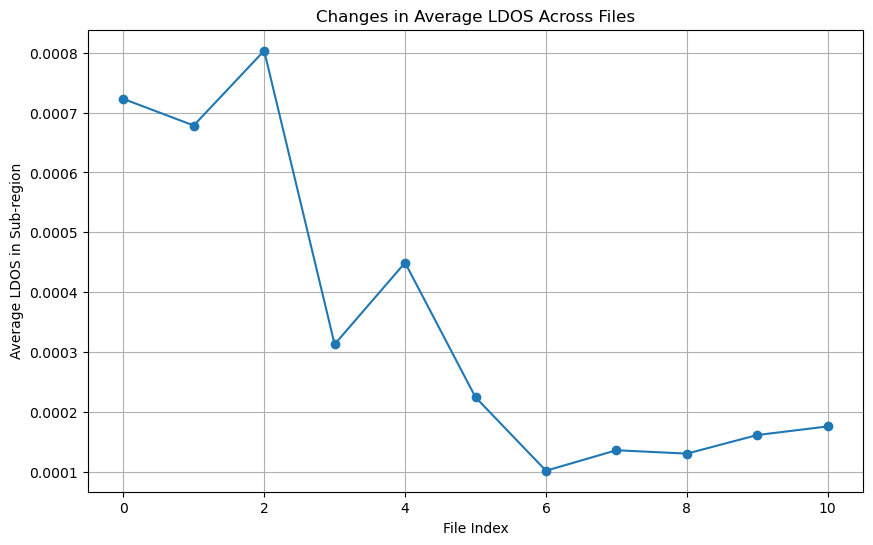

In [ ]:
# Define the sub-region (example: rows 10 to 20, columns 5 to 15)
subregion_rows = slice(10, 20)
subregion_cols = slice(5, 15)

# Function to calculate the average LDOS in the sub-region
def calculate_average_ldos(data):
    subregion = data[subregion_rows, subregion_cols]
    return np.mean(subregion)

# Get a list of all text files in the directory
file_list = sorted([f for f in os.listdir() if f.endswith(".txt")])

# Initialize lists to store indices and average LDOS values
indices = []
average_ldos_values = []

# Process each file
for file_name in file_list:
    # Extract the index from the file name
    index = file_name.split("_")[-1].split(".")[0]
    indices.append(index)
    
    # Load the data from the file
    data = np.loadtxt(file_name, delimiter = ",")
    
    # Calculate the average LDOS in the sub-region
    average_ldos = calculate_average_ldos(data)
    average_ldos_values.append(average_ldos)

# fixing the order of indices
indices = np.array(indices, dtype=int)
sorted_order = np.argsort(indices)
average_ldos_values = np.array(average_ldos_values)[sorted_order]
indices = indices[sorted_order]

# Plot the changes in average LDOS across all indices
plt.figure(figsize=(10, 6))
plt.plot(indices, average_ldos_values, marker='o', linestyle='-')
plt.xlabel('File Index')
plt.ylabel('Average LDOS in Sub-region')
plt.title('Changes in Average LDOS Across Files')
plt.grid(True)
plt.show()

##### Based on the observed trend in the LDOS, with high fluctuations at the lower energy levels, I think that the lower energies correspond to states within the conduction band. As we move to higher energies, the LDOS decreases, which suggests the system is transitioning into a band gap region. This lower LDOS in the band gap is expected, as there are fewer available electronic states for the electrons in this energy range.